In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anshu141902/Python_Project/master/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


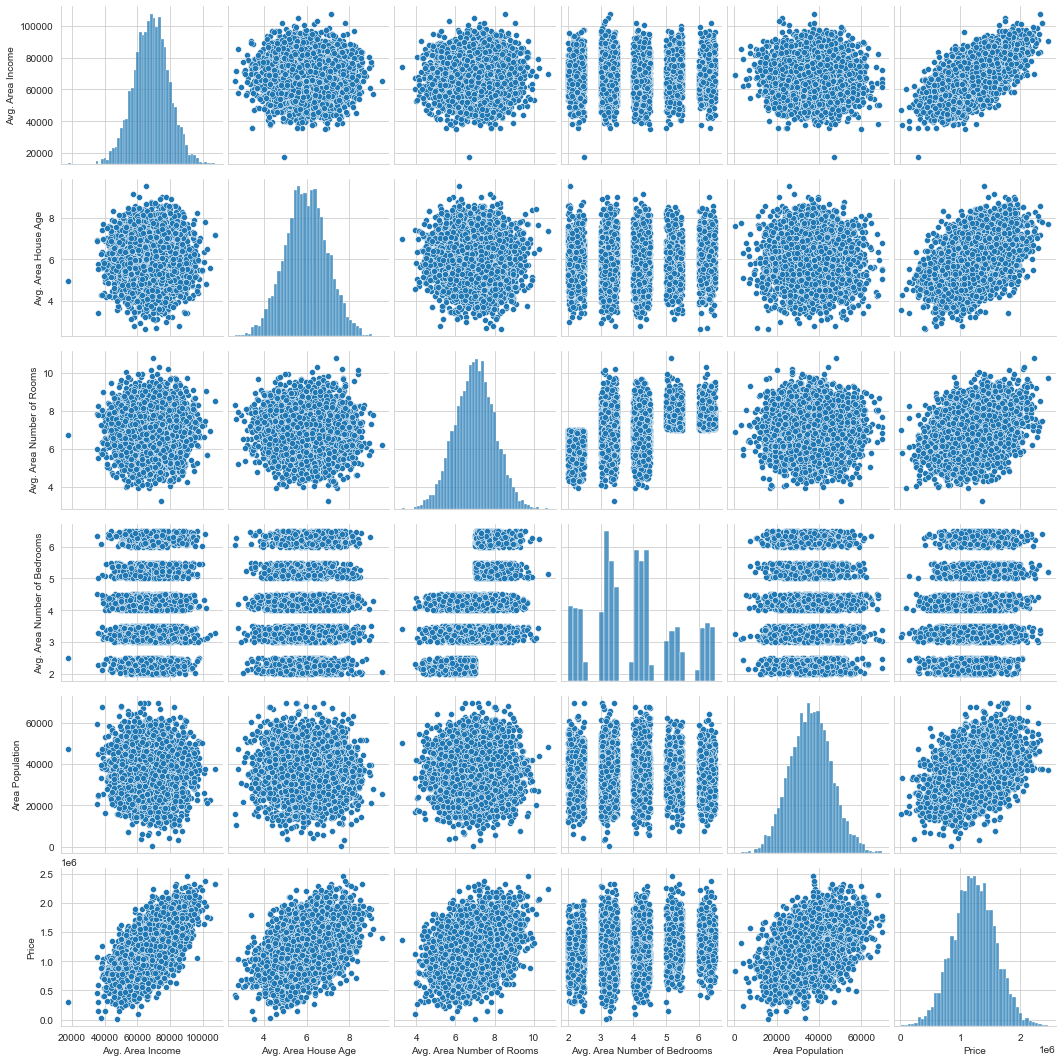

In [7]:
sns.set_style('whitegrid')
sns.pairplot(df)

In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


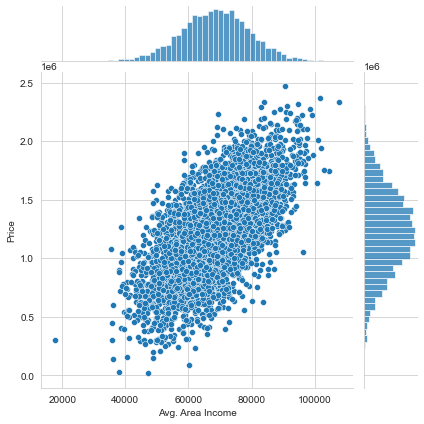

In [13]:
sns.jointplot('Avg. Area Income', 'Price', data = df, kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


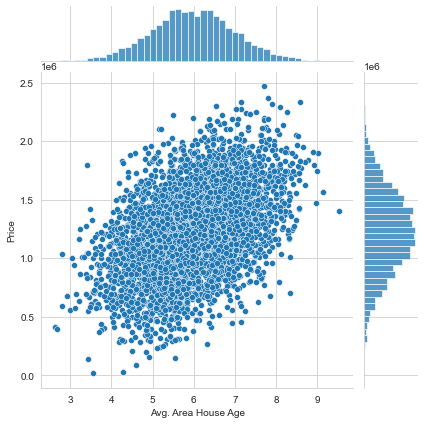

In [17]:
sns.jointplot('Avg. Area House Age', 'Price', data = df, kind='scatter')

<AxesSubplot:>

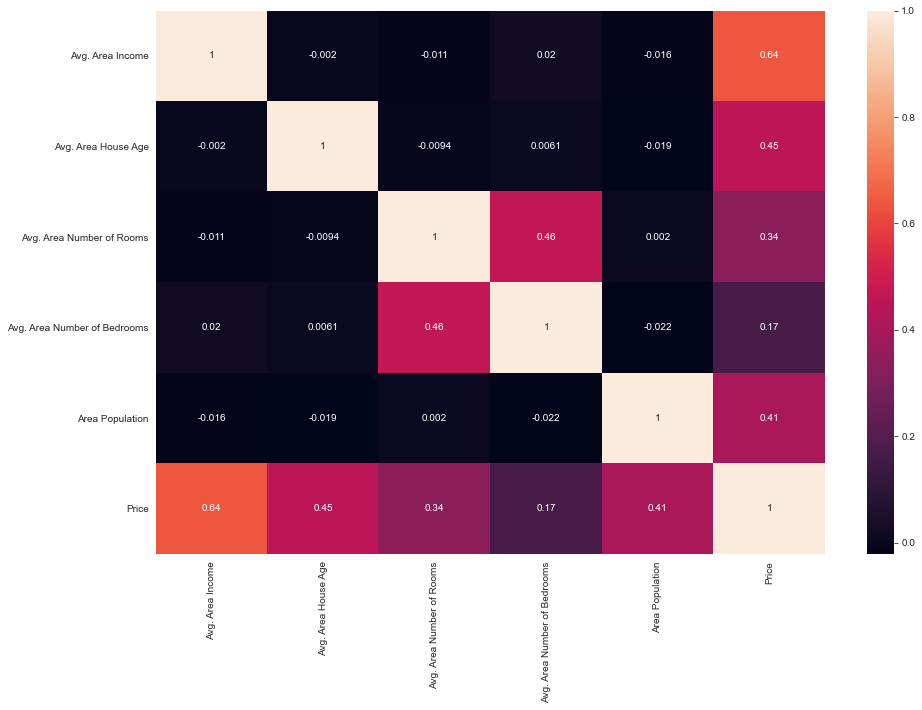

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [14]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.score(X_test,y_test)

0.9196140906860597

In [23]:
lr.coef_

array([2.16502503e+01, 1.65928462e+05, 1.21181356e+05, 1.79898513e+03,
       1.52326050e+01])

In [24]:
lr.intercept_

-2649004.4356372748

In [26]:
r_sq = lr.score(X_test,y_test)
print('coefficient of determination:', r_sq)
print('intercept:', lr.intercept_)
print('coefficients:', lr.coef_)

coefficient of determination: 0.9196140906860597
intercept: -2649004.4356372748
coefficients: [2.16502503e+01 1.65928462e+05 1.21181356e+05 1.79898513e+03
 1.52326050e+01]


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
lr_pipe = Pipeline([('sc',StandardScaler()),('lr',LinearRegression())])

In [35]:
lr_pipe.fit(X_test,y_test)

Pipeline(steps=[('sc', StandardScaler()), ('lr', LinearRegression())])

In [36]:
r_sq = lr_pipe.score(X_test,y_test)
print('coefficient of determination:', r_sq)
print('intercept:', lr.intercept_)
print('coefficients:', lr.coef_)

coefficient of determination: 0.9197016544431972
intercept: -2649004.4356372748
coefficients: [2.16502503e+01 1.65928462e+05 1.21181356e+05 1.79898513e+03
 1.52326050e+01]


In [38]:
import pickle

In [39]:
with open('lr_pipe', 'wb') as f:
    pickle.dump(lr_pipe, f)